In [ ]:
# Predicting rainfall - yes / no (boolean values)

In [102]:
from google.colab import files

# Upload dataset manually
uploaded = files.upload()

Saving modified_location_1.xlsx to modified_location_1.xlsx


In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Ensure inline plotting if using Jupyter Notebook
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score

In [104]:
import pandas as pd

# 1978 to 2022
file_path = "modified_location_1.xlsx"

# Read the Excel file
data = pd.read_excel(file_path)

# Display the first few rows of the data
print(data.head())

        Date    Day  Year  Month Location  Rainfall (in mm)  Latitude  \
0 1901-01-01  Day_1  1901      1    Loc_1               3.0     27.25   
1 1901-01-02  Day_2  1901      1    Loc_1               8.0     27.25   
2 1901-01-03  Day_3  1901      1    Loc_1               0.0     27.25   
3 1901-01-04  Day_4  1901      1    Loc_1               0.0     27.25   
4 1901-01-05  Day_5  1901      1    Loc_1               0.0     27.25   

   Longitude  Quarter  Cumulative_Rainfall  Previous_Day_Rainfall  Weekly Sum  \
0       88.5        1                  3.0                    0.0         3.0   
1       88.5        1                 11.0                    3.0        11.0   
2       88.5        1                 11.0                    8.0        11.0   
3       88.5        1                  8.0                    0.0        11.0   
4       88.5        1                  0.0                    0.0        11.0   

   Weekly_Average hasRainfall Landslide_possibility  Season  
0        3.0

In [105]:
data.shape

(61600, 16)

In [106]:
print(data.columns)

Index(['Date', 'Day', 'Year', 'Month', 'Location', 'Rainfall (in mm)',
       'Latitude', 'Longitude', 'Quarter', 'Cumulative_Rainfall',
       'Previous_Day_Rainfall', 'Weekly Sum', 'Weekly_Average', 'hasRainfall',
       'Landslide_possibility', 'Season'],
      dtype='object')


In [107]:
data.head()

# divided in classes - 1 for rainfall, 0 for no rainfall

,Date,Day,Year,Month,Location,Rainfall (in mm),Latitude,Longitude,Quarter,Cumulative_Rainfall,Previous_Day_Rainfall,Weekly Sum,Weekly_Average,hasRainfall,Landslide_possibility,Season
0,1901-01-01,Day_1,1901,1,Loc_1,3.0,27.25,88.5,1,3.0,0.0,3.0,3.000000,yes,no,Winter
1,1901-01-02,Day_2,1901,1,Loc_1,8.0,27.25,88.5,1,11.0,3.0,11.0,5.500000,yes,no,Winter
2,1901-01-03,Day_3,1901,1,Loc_1,0.0,27.25,88.5,1,11.0,8.0,11.0,3.666667,no,no,Winter
3,1901-01-04,Day_4,1901,1,Loc_1,0.0,27.25,88.5,1,8.0,0.0,11.0,2.750000,no,no,Winter
4,1901-01-05,Day_5,1901,1,Loc_1,0.0,27.25,88.5,1,0.0,0.0,11.0,2.200000,no,no,Winter


In [108]:
data['hasRainfall'].value_counts()

,count
hasRainfall,
yes,32798
no,28802


In [109]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61600 entries, 0 to 61599
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date                   61600 non-null  datetime64[ns]
 1   Day                    61600 non-null  object        
 2   Year                   61600 non-null  int64         
 3   Month                  61600 non-null  int64         
 4   Location               61600 non-null  object        
 5   Rainfall (in mm)       61600 non-null  float64       
 6   Latitude               61600 non-null  float64       
 7   Longitude              61600 non-null  float64       
 8   Quarter                61600 non-null  int64         
 9   Cumulative_Rainfall    61600 non-null  float64       
 10  Previous_Day_Rainfall  61600 non-null  float64       
 11  Weekly Sum             61600 non-null  float64       
 12  Weekly_Average         61600 non-null  float64       
 13  h

In [110]:
data['Day_of_Week'] = data['Date'].dt.dayofweek  # Day of the week (0=Monday, 6=Sunday)
data['Day_of_Year'] = data['Date'].dt.dayofyear  # Day of the year (1-365/366)

In [111]:
print(data.columns)

Index(['Date', 'Day', 'Year', 'Month', 'Location', 'Rainfall (in mm)',
       'Latitude', 'Longitude', 'Quarter', 'Cumulative_Rainfall',
       'Previous_Day_Rainfall', 'Weekly Sum', 'Weekly_Average', 'hasRainfall',
       'Landslide_possibility', 'Season', 'Day_of_Week', 'Day_of_Year'],
      dtype='object')


In [112]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['Season'] = label_encoder.fit_transform(data['Season'])

In [113]:
X = data.drop(['Landslide_possibility','Location','hasRainfall','Quarter','Date','Day','Rainfall (in mm)'] , axis = 1)
y = data['hasRainfall']
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.3 , random_state = 1)

In [114]:
print(X.columns)

Index(['Year', 'Month', 'Latitude', 'Longitude', 'Cumulative_Rainfall',
       'Previous_Day_Rainfall', 'Weekly Sum', 'Weekly_Average', 'Season',
       'Day_of_Week', 'Day_of_Year'],
      dtype='object')


In [115]:
# LOGISTIC REGRESSION

In [116]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train , y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [117]:
y_pred = model.predict(X_test)

In [118]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8701839826839827
Classification Report:
               precision    recall  f1-score   support

          no       0.82      0.93      0.87      8585
         yes       0.93      0.82      0.87      9895

    accuracy                           0.87     18480
   macro avg       0.87      0.87      0.87     18480
weighted avg       0.88      0.87      0.87     18480



In [119]:
# SUPPORT VECTOR CLASSIFIER

In [120]:
from sklearn.linear_model import SGDClassifier
# changed from SVC() then LinearSVC()
model = SGDClassifier(loss="hinge")  # Hinge loss is used for SVM
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.5354437229437229
Classification Report:
               precision    recall  f1-score   support

          no       0.00      0.00      0.00      8585
         yes       0.54      1.00      0.70      9895

    accuracy                           0.54     18480
   macro avg       0.27      0.50      0.35     18480
weighted avg       0.29      0.54      0.37     18480



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [121]:
# RANDOM FOREST CLASSIFIER

In [122]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.911417748917749
Classification Report:
               precision    recall  f1-score   support

          no       0.93      0.87      0.90      8585
         yes       0.90      0.94      0.92      9895

    accuracy                           0.91     18480
   macro avg       0.91      0.91      0.91     18480
weighted avg       0.91      0.91      0.91     18480



In [123]:
new = data[data['Location'] == 0]
new.head()

,Date,Day,Year,Month,Location,Rainfall (in mm),Latitude,Longitude,Quarter,Cumulative_Rainfall,Previous_Day_Rainfall,Weekly Sum,Weekly_Average,hasRainfall,Landslide_possibility,Season,Day_of_Week,Day_of_Year


In [124]:
new.shape

(0, 18)

In [125]:
monthly_location_rainfall = data.groupby(['Month','Location'])['Rainfall (in mm)'].sum().reset_index()
monthly_location_rainfall

,Month,Location,Rainfall (in mm)
0,1,Loc_1,2616.0
1,2,Loc_1,5655.2
2,3,Loc_1,11383.6
3,4,Loc_1,26714.2
4,5,Loc_1,46344.6
5,6,Loc_1,96195.2
6,7,Loc_1,121525.2
7,8,Loc_1,94987.6
8,9,Loc_1,69789.4
9,10,Loc_1,23009.2


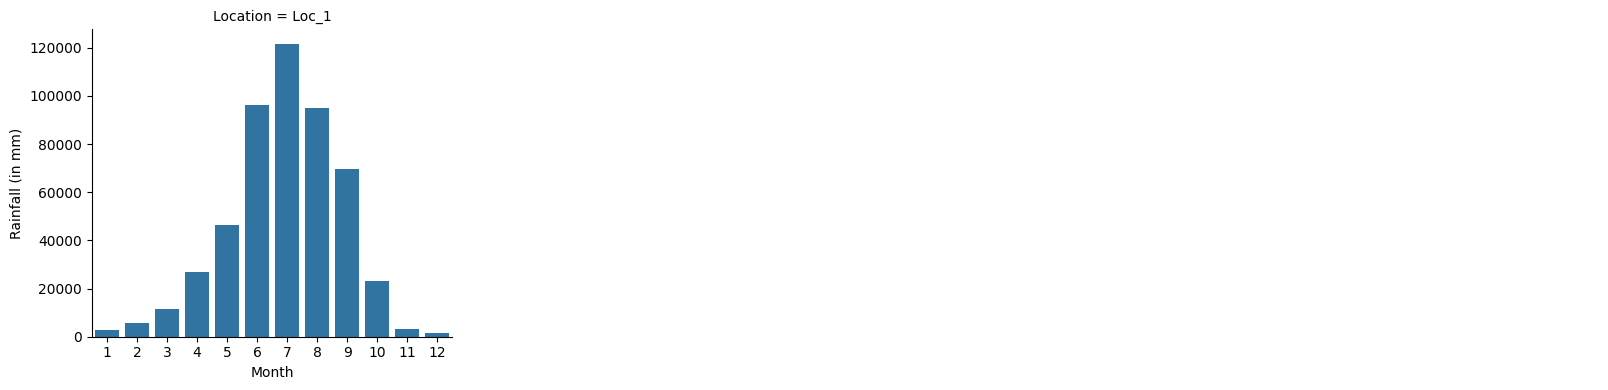

In [126]:
# g = sns.FacetGrid(data = monthly_location_rainfall , col="Location", col_wrap=4, height=4)
# g.map(sns.barplot , 'Month' , 'Rainfall (in mm)',order=range(1, 13))

sns.catplot(
    data=monthly_location_rainfall,
    kind="bar",
    x="Month",
    y="Rainfall (in mm)",
    col="Location",
    col_wrap=4,
    order=range(1, 13),
    height=4
)